# <center>『 밑바닥부터 시작하는 딥러닝 』</center>

<img src="http://image.kyobobook.co.kr/images/book/large/636/l9788968484636.jpg">

---

# 4장. 신경망 학습

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터에서-학습한다!" data-toc-modified-id="데이터에서-학습한다!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터에서 학습한다!</a></span><ul class="toc-item"><li><span><a href="#데이터-주도-학습" data-toc-modified-id="데이터-주도-학습-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>데이터 주도 학습</a></span></li><li><span><a href="#훈련-데이터와-시험-데이터" data-toc-modified-id="훈련-데이터와-시험-데이터-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>훈련 데이터와 시험 데이터</a></span></li></ul></li><li><span><a href="#손실-함수" data-toc-modified-id="손실-함수-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>손실 함수</a></span><ul class="toc-item"><li><span><a href="#오차제곱합-(SSE)" data-toc-modified-id="오차제곱합-(SSE)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>오차제곱합 (SSE)</a></span></li><li><span><a href="#교차-엔트로피-오차-(CEE)" data-toc-modified-id="교차-엔트로피-오차-(CEE)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>교차 엔트로피 오차 (CEE)</a></span></li><li><span><a href="#미니배치-학습" data-toc-modified-id="미니배치-학습-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>미니배치 학습</a></span></li><li><span><a href="#(배치용)-교차-엔트로피-오차-구현하기" data-toc-modified-id="(배치용)-교차-엔트로피-오차-구현하기-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>(배치용) 교차 엔트로피 오차 구현하기</a></span></li><li><span><a href="#왜-손실-함수를-설정하는가?" data-toc-modified-id="왜-손실-함수를-설정하는가?-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>왜 손실 함수를 설정하는가?</a></span></li></ul></li><li><span><a href="#수치-미분" data-toc-modified-id="수치-미분-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>수치 미분</a></span><ul class="toc-item"><li><span><a href="#미분" data-toc-modified-id="미분-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>미분</a></span></li><li><span><a href="#수치-미분의-예" data-toc-modified-id="수치-미분의-예-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>수치 미분의 예</a></span></li><li><span><a href="#편미분" data-toc-modified-id="편미분-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>편미분</a></span></li></ul></li><li><span><a href="#기울기" data-toc-modified-id="기울기-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>기울기</a></span></li><li><span><a href="#학습-알고리즘-구현하기" data-toc-modified-id="학습-알고리즘-구현하기-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>학습 알고리즘 구현하기</a></span></li></ul></div>

--- 

이번 장의 주제는 **신경망 학습**입니다. 여기서 학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것입니다. 신경망이 학습할 수 있도록 해주는 지표인 **손실 함수**의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표입니다. 손실 함수의 값을 가급적 작게 만드는 기법으로, **함수의 기울기를 활용하는 경사법**을 소개합니다.

## 데이터에서 학습한다!

신경망의 특징은 데이터를 보고 학습할 수 있다는 점입니다. 가중치 매개변수 값을 데이터를 보고 자동으로 결정한다는 뜻입니다.

### 데이터 주도 학습

신경망과 딥러닝은 기존 기계학습에서 사용하던 방법보다 사람의 개입을 더욱 배재할 수 있게 해주는 중요한 특성을 찾습니다. **특징(feature)**이란 입력 데이터에서 본질적인 데이터를 정확하게 추출할 수 있도록 설계된 변환기를 가리킵니다.  

**기계 학습**에서는 모아진 데이터로부터 규칙을 찾아내는 역할은 '기계'가 담당하지만, 이미지를 벡터로 변환할 때 사용하는 특징은 '사람'이 설계합니다. 이 말은 적합한 특징을 쓰지 않으면 좋은 결과를 얻지 못한다는 말입니다. 반면 **신경망(딥러닝)** 방식은 사람이 개입하지 않습니다. 그리하여 딥러닝은 **종단간 기계학습(end-to-end mechine learning)**이라고도 합니다.

<img src="https://media.vlpt.us/images/jakeseo_me/post/d9bacee1-a872-4bd2-adcc-2ce3510397b1/fig%204-2.png" width=50%>

### 훈련 데이터와 시험 데이터

기계학습 문제는 데이터를 **훈련 데이터(training data)**와 **시험 데이터(test data)**로 나눠 학습과 실험을 수행하는 것이 일반적입니다. 우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾습니다. 그런 다음 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가하는 것입니다.  

그래서 데이터셋 하나로만 매개변수의 학습과 평가를 수행하면 올바른 평가가 될 수 없습니다. 수중의 데이터셋은 제대로 맞히더라도 다른 데이터셋에는 엉망인 일도 벌어집니다. **한 데이터셋에만 지나치게 최적화된 상태**를 **오버피팅(overfitting)**이라고 합니다.

## 손실 함수

신경망 학습에서는 형재의 상태를 하나의 지표인 **손실 함수**로 표현하고, 이를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색합니다. '행복 지표'를 가진 사람이 그 지표를 근거로 '최적의 인생'을 탐색하듯, 신경망도 '손실 함수'를 기준으로 '최적의 매개변수 값'을 탐색합니다.  

이때, 손실 함수는 신경망 성능의 '나쁨'을 나타내는 지표입니다.

### 오차제곱합 (SSE)

가장 많이 쓰이는 손실 합수는 **오차제곱합(sum of squares for error, SSE)**입니다.

<img src="https://media.vlpt.us/images/jakeseo_me/post/1f308ef9-a787-44b2-b7d1-31753e849591/MSE.png" width=30%>

여기서 **y_k**는 **신경망의 출력(신경망이 추정한 값)**, **t_k**는 **정답 레이블**, **k**는 **데이터의 차원 수**를 나타냅니다.  

이때, 1/2는 미분을 쉽게 하기 위해 존재합니다.

In [1]:
import numpy as np

In [2]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
# 정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1: '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
ex_1 = sum_squares_error(np.array(y), np.array(t))

# 예2: '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0]
ex_2 = sum_squares_error(np.array(y), np.array(t))

print('2 로 예측한 경우: {}, \n7 로 예측한 경우: {}'.format(ex_1, ex_2))

2 로 예측한 경우: 0.09750000000000003, 
7 로 예측한 경우: 0.5975


위의 예제 결과를 봤을 때, 오차제곱합 기준으로는 첫 번째 추정 결과가 오차가 더 작으므로 정답에 더 가까울 것으로 판단할 수 있습니다.

### 교차 엔트로피 오차 (CEE)

또 다른 손실 함수로서 **교차 엔트로피 오차(cross entropy error, CEE)**도 자주 이용합니다.

<img src="https://media.vlpt.us/images/jakeseo_me/post/0e182974-46dc-42bd-bd74-146f7dd7737f/CEE.png" width=30%>

여기에서 log는 밑이 e인 자연로그(log_e)입니다. **y_k**는 **신경망의 출력**, **t_k**는 **정답 레이블**입니다.  
이때 t_k는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0인 원-핫 인코딩 형태이기 때문에 실질적으로 정답일 때의 추정(t_k가 1일 때의 y_k)의 자연로그를 계산하는 식이 됩니다.

In [4]:
def cross_entropy_error(y, t):
    # np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 
    # 더 이상 계산을 진행할 수 없게 되기 때문에 아주 작은 값을 더해서 0이 되지 않도록 함
    delta = 1e-7  
    return -np.sum(t * np.log(y + delta))

In [5]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1: '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
ex_1 = cross_entropy_error(np.array(y), np.array(t))

# 예2: '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0]
ex_2 = cross_entropy_error(np.array(y), np.array(t))

print('2 로 예측한 경우: {}, \n7 로 예측한 경우: {}'.format(ex_1, ex_2))

2 로 예측한 경우: 0.510825457099338, 
7 로 예측한 경우: 2.302584092994546


즉, 결과(오차 값)가 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단한 것으로, 앞서 오차제곱합의 판단과 일치합니다.

### 미니배치 학습

지금까지는 데이터 하나에 대한 손실 합수만 생각해왔습니다. 이제부터는 훈련 데이터 모두에 대한 손실 함수의 합을 구하는 방법을 생각해보겠습니다.

<img src="https://media.vlpt.us/images/jakeseo_me/post/2019fce0-df94-434d-9a26-7d793f5b0917/batch_CEE.png" width=30%>

데이터가 N개인 경우이고, **t_nk**는 **n번째 데이터의 k번째 값**을 의미합니다. 마지막에 N으로 나누어 정규화하고 있습니다. N으로 나눔으로써 '평균 손실 함수'를 구하는 것입니다.  

그런데 훈련 데이터의 개수가 너무 많아진다면 일일이 손실 함수를 계산하는 것은 현실적이지 않습니다. 이런 경우 데이터 일부를 추려 전체의 근사치로 이용합니다. **훈련 데이터로부터 일부만 골라 학습을 수행**하며, 이 **일부**를 **미니배치(mini-batch)**라고 합니다.

### (배치용) 교차 엔트로피 오차 구현하기

In [6]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.rasahep(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 왜 손실 함수를 설정하는가?

왜 **정확도**라는 지표를 놔두고 **손실 함수**라는 값이라는 우회적인 방법을 택하는 이유가 무엇일까요? 이 의문은 신경망 학습에서의 **미분**의 역할에 주목한다면 해결됩니다.  

신경망 학습에서는 손실 함수의 값을 가장 작게 하는 매개변수 값을 찾습니다. 이때 매개변수의 미분(정확히는 기울기)를 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복합니다.  
가중치 **매개변수의 손실 함수의 미분**이란 **가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하나**라는 의미입니다. 미분 값이 0이 될 때 가중치 매개변수의 갱신이 멈춥니다.  

정확도를 지표로 삼아서는 안 되는 이유는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문입니다. 

<img src="https://media.vlpt.us/images/jakeseo_me/post/08a50cb6-a1f9-4498-adeb-2bd46ec3ae23/fig%204-4.png" width=70%>

정확도를 계단 함수에, 손실 함수를 시그모이드 함수에 비유할 수 있습니다. 계단 함수는 한순간만 변화를 일으키지만, 시그모이드 함수는 출력이 연속적으로 변하고 곡선의 기울기도 변합니다. 즉, 시그모이드 함수의 미분은 어느 장소라도 0이 되지는 않습니다.

## 수치 미분

경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 정합니다. 기울기란 무엇인지, 또 어떤 성질이 있는지를 설명하기에 앞서, 이번 절에서는 **미분**부터 복습해보겠습니다.

### 미분

미분은 특정 순간의 변화량을 뜻합니다.

<img src="https://media.vlpt.us/images/jakeseo_me/post/d9d74dd0-107c-445f-bc7b-d4fa8349a96e/meboon.png" width=30%>

즉, x의 작은 변화가 함수 f(x)를 얼마나 변화시키느냐를 의미합니다. 이때 시간의 작은 변화, 즉 시간을 뜻하는 h를 한없이 0에 가깝게 한다는 의미를 lim으로 나타납니다.

In [7]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / (2)

위의 구현은 작은 값이 생략되어 최종 계산 결과에 오차가 생기는 **반올림 오차(rounding error)** 문제를 일으킵니다.

In [8]:
np.float32(1e-50)

0.0

또한 진정한 미분이 아니라 함수 f의 차분을 계산하는 한계가 있습니다.

<img src="https://media.vlpt.us/images/jakeseo_me/post/98fba7d4-7d0c-451a-9df1-09c0a367b5e7/fig%204-5.png" width=50%>

그리하여 다음과 같이 중심 차분(중앙 차분)을 통해 구현하기도 합니다. 다음은 나쁜 구현에서의 두 개선점을 적용해 다시 구현한 수치 미분입니다.  

(수치 미분이란 아주 작은 차분으로 미분하는 것을 말합니다.)

In [9]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

### 수치 미분의 예

In [10]:
import matplotlib.pylab as plt

In [11]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

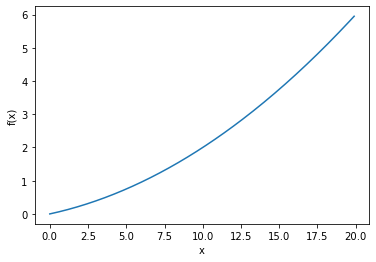

In [12]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")

plt.plot(x, y)

plt.show()

In [13]:
numerical_diff(function_1, 5), numerical_diff(function_1, 10)

(0.1999999999990898, 0.2999999999986347)

### 편미분

**편미분**이란 변수가 여럿인 함수에 대한 미분을 말합니다. 편미분은 앞의 예와 달리 변수가 2개라는 점에 주의해야 합니다.

In [14]:
def function_2(x):
    return x[0]**2 + x[1]**2

## 기울기

## 학습 알고리즘 구현하기